## ML Basics: Maximum Likelihood Estimation

#### Introduction

This is the first of a set of little blog-style post that I'm creating to get a better grasp on machine learning concepts. I'm mainly following the book "Deep Learning" by Ian Goodfellow, Yoshua Bengio and Aaron Courville [1], but if any other resources are used I'll be citing them underneath this introduction. While alot of these examples are going to be ones I take from [1] I think sometimes it helps to provide some context or explanation to an equation which is what I'm going to try to do throughought this series. If you see any mistakes please feel free to email me at adibfixeshismistakes@gmail.com.


#### Additional References
https://towardsdatascience.com/probability-concepts-explained-maximum-likelihood-estimation-c7b4342fdbb1 [2] (Jonny Brooks-Bartlett)

https://www.probabilitycourse.com/chapter8/8_2_0_point_estimation.php [3] (Hossein Pishro-Nik)

https://towardsdatascience.com/mse-and-bias-variance-decomposition-77449dd2ff55 [4] (Maksym Zavershynskyi)

https://www.math.ubc.ca/~pwalls/math-python/integration/riemann-sums/ [5] (Patrick Walls)

https://personal.psu.edu/abs12/stat504/Lecture/lec3_4up.pdf [6] (Aleksandra B. Slavković STAT504)

https://ocw.mit.edu/courses/mathematics/18-443-statistics-for-applications-fall-2006/lecture-notes/ [9] (Dmitry Panchenko MIT 18.650) Lecture 3

https://math.stackexchange.com/q/31609 [10] (Arturo Magidin) Math StackExchange

https://sphweb.bumc.bu.edu/otlt/MPH-Modules/BS/BS704_Probability/BS704_Probability9.html [11] (Boston University, no author listed)

Before we begin I would like to clean up some terminology because most of the sources that I've read through so far have been quite confusing. Random variables describing the entire population will be symbolized as a capitalized, bold-font character such as $X$. A sample set of n samples will be represented as $X_n$ = {$X_1, X_2,...X_n$}. There may be situations where we may need to symbolize multiple sample sets each containing n data samples. For m trials of n samples, the notation will be $X_n^m$. If the superscript is omitted its safe to assume $X_n$ is referring to just a single sample set. The actual value of these individual data samples will be represented as $x_n$ = {$X_1=x_1, X_2,x_2,...X_n=x_n$}.

#### Estimators

Estimators are functions that can be used to provide the best possible estimate ($\hat{\theta}$) of some quantity of interest (${\theta}$) where the true value $\theta$ is some fixed quantity for the true distribution of $X$. If you're thinking "wow this is a very vague definition", you're right, it is! If {$x_1, x_2,...,x_m$} are a set of independent, identically distributed data points collected by sampling some random variable $X$. The *point estimator* is some function g such that:

$$\hat{\theta} = g(x_1 , x_2 , ... x_m )$$

Pretty much any function can be considered an estimator. If you are sampling some random variable ${X}$ with an unknown parametric probability density we can estimate the parameters of the model by making some educated guesses about the type of distribution the sample data best resembles. 

Using an example from [1], suppose we have our set of samples and they are distributed according to some gaussian distribution with unknown parameters $\mu$ and $\sigma^2$. We have:

$$ P(X_i=x_i ; \mu; \sigma^2) = N(X_i=x_i ; \mu; \sigma^2) $$

$$ P(X_i=x_i ; \mu; \sigma^2) = \frac{1}{\sqrt{2\pi\sigma^2}}\exp^{-\frac{(x_i - \mu)^2}{2\sigma^2}}$$

$\mu$ or $\sigma^2$ are unknown but we can estimate $\hat{\mu}$ by just taking the average value of all of the sampled points.

$$\hat{\mu} = \frac{1}{m}\sum^{m}_{i=1}X_i $$

#### Evaluating Estimators

##### Bias & Variance
Notice that while this example has a pretty reasonable estimator for $\hat{\mu}$, **the definition of an estimator makes no guarantees that the estimator will accurately predict the value that its trying to estimate**. So we need some measure of how well an estimator will perform, or more importantly how closely it will come to the true value of $\theta$. **The *bias* and *variance* of an estimator are measures of its offset from the true value of $\theta$ and how much it will vary as we apply the estimator to multiple independently sampled data sets**. They are defined as:

$$ Bias(\hat{\theta}) = E[\hat{\theta}] - \theta $$

$$ Var(\hat{\theta}) = E[(\hat{\theta} - E[\hat{\theta}])^2]$$

Continuing the example from before, the bias for our estimator of $\hat{\mu}$ can be calculated as:

$$
\begin{aligned}
Bias(\hat{\mu}) &= E[\hat{\mu}] - \mu \\
                &= E[\frac{1}{m}\sum^{m}_{i=1}X_i] - \mu \\
                &= \frac{1}{m}\sum^{m}_{i=1}E[X_i] - \mu \\
                &= \frac{1}{m}\sum^{m}_{i=1}\mu - \mu \\
                &= \mu - \mu \\
                &= 0
\end{aligned}
$$

This shows that using the sample mean as an estimate for the gaussian mean parameter results in an unbiased estimator.

Similarly we can try to calculate the variance of the estimator.

$$
\begin{aligned}
Var(\hat{\mu}) &= Var(\frac{1}{m}\sum^{m}_{i=1}X_i) \\
               &= \frac{1}{m}Var(\sum^{m}_{i=1}X_i) \\
               &= \frac{1}{m}\sum^{m}_{i=1}Var(X_i) \\
               &= \sigma^2
\end{aligned}
$$

##### Mean Squared Error

While these metrics are useful **ultimately what we want to do when choosing between estimators is to pick the one with the lowest amount of error between $\hat{\theta}$ and $\theta$**. Mean squared error does exactly this, and is defined as:

$$
\begin{aligned}
MSE(\hat{\theta}) &= E[(\hat{\theta} - \theta)^2] \\
                  &= E[(\hat{\theta}^2 - 2 \hat{\theta}\theta + \theta^2] \\
                  &= E[\hat{\theta}^2] - 2E[\hat{\theta}\theta] + E[\theta^2]
\end{aligned}
$$

I decomposed the equation a little bit to show you the dependence of the MSE on the bias and variance of an estimator. 

To complete this derivation we need to work out two other derivations.

$$
\begin{aligned}
Bias(\hat{\theta})^2 &= (E[\hat{\theta}] - \theta)^2 \\
                     &= (E[\hat{\theta}])^2 - 2E[\hat{\theta}\theta] + E[\theta^2] \\
\end{aligned}
$$

Because the real value $\theta$ isn't a random variable, its expectation is equal to its value.

$$
\begin{aligned}
Bias(\hat{\theta})^2 &= (E[\hat{\theta}])^2 - 2\theta E[\hat{\theta}] + \theta^2 \\
\end{aligned}
$$

The second derivation we need is a decomposition of the variance of an estimator.

$$
\begin{aligned}
Var(\hat{\theta}) &= E[(\hat{\theta} - E[\hat{\theta}])^2] \\
                  &= E[\hat{\theta}^2 - 2\hat{\theta}E[\hat{\theta}] + (E[\hat{\theta}])^2] \\
                  &= E[\hat{\theta}^2] - 2E[\hat{\theta}E[\hat{\theta}]] + E[(E[\hat{\theta}])^2] \\
                  &= E[\hat{\theta}^2] - 2E[\hat{\theta}]^2 + E[\hat{\theta}]^2 \\
                  &= E[\hat{\theta}^2] - E[\hat{\theta}]^2
\end{aligned}
$$

A potentially non-obvious trick that is used in the derivation above is that **$E[E[x]]$ is actually taking the expected value of a scalar non-random variable, so its equal to $E[x]$**. This is how we are able to convert $2E[\hat{\theta}E[\hat{\theta}]] = 2E[\hat{\theta}]^2$ and likewise, $E[(E[\hat{\theta}])^2] = E[\hat{\theta}]^2$.

Now finally, if we put these two derivations together:

$$
\begin{aligned}
Var(\hat{\theta}) + Bias(\hat{\theta})^2 &= E[(\hat{\theta}^2] - E[\hat{\theta}]^2 + (E[\hat{\theta}])^2 - 2E[\hat{\theta}\theta] + E[\theta^2] \\
                                        &= E[(\hat{\theta}^2] + 2E[\hat{\theta}\theta] + E[\theta^2] \\
                                        &= MSE(\hat{\theta})
\end{aligned}
$$

This might seem like a long walk for a small drink of water but this derivation of **the bias-variance decomposition of the MSE shows that when comparing the viability of two seperate estimators we dont really care about the variance or bias independently, but rather the balance between then that achieves the lowest MSE** (obviously ideally we want both of them to be low!).

##### Consistency

**Consistency is an asymptotic property of an estimator that tells us whether or not our estimate $\hat{\theta} \rightarrow \theta$ as the size of our sample set $n \rightarrow \infty$**. If:
$$
\begin{aligned}
\hat{\theta} - \theta \rightarrow 0;\ n \rightarrow \infty
\end{aligned}
$$
the estimator is considered consistent.

#### Evaluating Function Estimators
So far I've only been talking about point estimators, but as mentionned earlier an estimator can also be a function. **During function estimation the goal is to estimate the relationship between a desired statistic and some sample data set**. This estimator can then be used to estimate the same desired statistic on a completely different set (the test data). Suppose our desired output quantity is $y$ and we have a set of I.I.D data samples {$x^{(1)}, x^{(2)}..., x^{(m)}$} is some training dataset S. We want to find an estimate $\hat{f}_S$ of some function f such that:

$$
y = f(x) + \epsilon
$$

Where $\epsilon$ represents all of the noise components of y that cannot be estimated from just $x$ alone with some probability distribution that is different from $S$. In this scenario we want to calculate MSE as:

$$
MSE = E[(y - \hat{f}_S(x))^2]
$$

We can decompose this equation into some key components but we need to utilize some identities of the variance and expected value of two random variables. The derivation for these identities are going to be omitted, since they're widely available online. Note both a and b in the identities below are random variables. These identities and the derivation that follows are identical to those presented in [4].

$$
\begin{aligned}
Var(a) &= E[a^2] - E^2[a]\\
E[ab] &= E[a]E[b] + Cov(a,b) \\
Var(a + b) &= Var(a) + Var(b) + 2Cov(a,b) \\
Var(a - b) &= Var(a) + var(b) - 2Cov(a,b) \\
Cov(a, b) &= 0\ when\ a\ and\ b\ are\ independent
\end{aligned}
$$

Now we can break down $MSE[\hat{f(x)}]$.

$$
\begin{aligned}
MSE[\hat{f(x)}] &= E[(y - \hat{f(x)})^2] \\
&= E[y^2] - 2E[y\hat{f(x)}] + E[\hat{f(x)}^2] \\
&= Var(y) + E[y]^2 + Var(\hat{f(x)}) + E[\hat{f(x)}]^2 -2E[y\hat{f(x)}] \\
&= Var(y) + E[y]^2 + Var(\hat{f(x)}) + E[\hat{f(x)}]^2 -2E[(f(x) + \epsilon)\hat{f(x)}] \\
&= Var(y) + E[y]^2 + Var(\hat{f(x)}) + E[\hat{f(x)}]^2 -2E[(f(x))(\hat{f(x))}] -2E[\epsilon\hat{f(x)}]
\end{aligned}
$$

We can now take advantage of the fact that $y = f(x) + \epsilon$. This has already been used to simplify the $-2E[y\hat{f(x)}]$ term, but now we can apply it to get a variance and bias term in terms of $f(x)$ and $\hat{f(x)$.

$$
\begin{aligned}
&= Var(f(x) + \epsilon) + E[f(x) + \epsilon]^2 + Var(\hat{f(x)}) + E[\hat{f(x)}]^2 -2E[(f(x))]E[(\hat{f(x))}] - 2Cov(f(x), \hat{f(x)}) -2E[\epsilon\hat{f(x)}] \\
&= Var(f(x)) + Var(\epsilon) - 2Cov(f(x), \epsilon) + E[f(x)]^2 + 2E[\epsilon]E[f(x)] + 2E[\epsilon]^2 + Var(\hat{f(x)}) + E[\hat{f(x)}]^2 -2E[(f(x))]E[(\hat{f(x))}] + Cov(f(x), \hat{f(x)}) -2E[\epsilon\hat{f(x)}] \\
&= Var(f(x) - \hat{f(x)}) + E[f(x)]^2 - 2E[f(x)]E[\hat{f(x)}] + E[\hat{f(x)}]^2 + Var(\epsilon) - 2Cov(f(x), \epsilon) + 2E[\epsilon]E[f(x)] + 2E[\epsilon]^2 - 2E[\epsilon\hat{f(x)}]\\
&= Var(f(x) - \hat{f(x)}) + (E[f(x)] - E[\hat{f(x)}])^2 + Var(\epsilon) - 2Cov(f(x), \epsilon) + 2E[\epsilon]E[f(x)] + 2E[\epsilon]^2 - 2E[\epsilon\hat{f(x)}]
\end{aligned}
$$

We can simplify this a little further by assuming that the noise term $\epsilon$ is independent of our data set $S$, and that it has some constant mean $c$.

$$
\begin{aligned}
&= Var(f(x) - \hat{f(x)}) + (E[f(x)] - E[\hat{f(x)}])^2 + Var(\epsilon) - 2cE[f(x)] + 2c^2 - 2cE[\hat{f(x)}]
\end{aligned}
$$

This can be simplified further still if we assume our noise model has mean $c=0$.

$$
\begin{aligned}
&= Var(f(x) - \hat{f(x)}) + (E[f(x)] - E[\hat{f(x)}])^2 + Var(\epsilon)
\end{aligned}
$$

**We're left with an equation that is very similar to the bias-variance decomposition of the MSE for point estimators. The variance term is $Var(f(x) - \hat{f(x)})$, measuring the amount of jitter we can expect the difference between the true model f(x) and $\hat{f(x)}$ to be as we vary $S$. The bias term is $(E[f(x)] - E[\hat{f(x)}])^2$, which is a measure of how well the estimator model will approximate the real model. Finally we have an additional term $Var(\epsilon)$ which is a measure of how much the noise term will impact the system.**

#### Maximum Likelihood Estimation
So far most of the analysis in this post has been about evaluating estimators, but no explanation has been given as to how we actually generate these estimators. Maximum likelihood estimation is a very simple algorithm for generating an estimator for the parameter values of some data model. **It states that we should pick the value of $\hat{\theta}$ that gives us the highest probability of observing our training data**. Mathematically we can define this as the optimization of the maximum of some likelihood function $L$ operating on the training data {$x_1,x_2,...x_m$} and the unknown parameter values $\hat{\theta}$.

$$
\begin{aligned}
L(X^m; \hat{\theta}) &= P(X^m_1 = x_1, X^m_2 = x_2, ..., X^m_n = x_n;\hat{\theta})\\
&= P(X^m_1=x^m_1)\cap P(X^m_2=x^m_2)...\cap P(X^m_n = x^m_n)\\
&= \prod^n_{i=1}P(X^m_i=x^m_i)
\end{aligned}
$$

Where $P$ is the probability distribution (if X is a continuous random variable) or probability mass function (if X is a discrete random varaible). Now the maximum likelihood estimate $\hat{\theta}_{ML}$ is the value of $\hat{\theta}$ that maximizes $L(x_1,x_2,...x_n;\hat{\theta}$. We can also do this for a vector of parameters $\hat{\theta}_1,\hat{\theta}_2,...\hat{\theta}_n$ rather than a single value, adapting from using it as a point estimator to a function estimator instead. Usually we take the log of this function, converting the probability from a geometric series to an arithmetic series. The optimization only cares about the location of the peak, not the actual values of the function, and because a logarithm is a positive monotonic function the location of the peak won't change when we take the log of both sides of this equation.

$$
L(X^m; \hat{\theta}) = \sum^n_{i=1}\log{P(X^m_i = x^m_i)}
$$


Lets look at some simple examples. Consider a set of data modeled by random variable $X$ with a normal distribution $N(X; \mu, \sigma^2)$. Suppose we want to estimate the mean $\mu$ and variance $\sigma^2$ of $X$ using a sample data set {$x_1,x_2,...x_n$}.

$$
\begin{aligned}
P(X^m; \mu, \sigma^2) &= \frac{1}{\sqrt{2\pi\sigma^2}}\exp^{-\frac{\sum^n_{i=1}(X^m_i - \mu)^2}{2\sigma^2}} \\
\end{aligned}
$$

**A standard method for finding the maximum of a function is to look at its first derivative with respect to the variable that we're trying to optimize**. Since we have two unknowns in this situation we can do this by taking the partial derivatives $\frac{dL}{d\mu}$ and $\frac{dL}{d\sigma^2}$. Now, assuming that each sample is I.I.D we can find the partial derivatives.

$$
\begin{aligned}
\ln{L(X^m; \mu, \sigma^2)} &= \ln{\frac{1}{(2\pi\sigma^2)^{\frac{n}{2}}}\exp^{-\frac{\sum^{n}_{i=1}(X^n_i - \mu)^2}{2\sigma^2}}}\\
&= ln{\frac{1}{(2\pi\sigma^2)^{\frac{n}{2}}}} - \frac{1}{2\sigma^2}\sum^{n}_{i=1}(X^n_i - \mu)^2\\
&= -\ln{(2\pi\sigma^2)^{\frac{n}{2}}} - \frac{1}{2\sigma^2}\sum^{n}_{i=1}(X^n_i - \mu)^2\\
&= -\frac{n}{2}\ln{2\pi\sigma^2} - \frac{1}{2\sigma^2}\sum^{n}_{i=1}(X^n_i - \mu)^2\\
&= -\frac{n}{2}\ln{2\pi} - \frac{n}{2}\ln{\sigma^2} - \frac{1}{2\sigma^2}\sum^{n}_{i=1}(X^n_i - \mu)^2\\
\end{aligned}
$$

$$
\begin{aligned}
\frac{dL}{d\mu} &= \frac{1}{\sigma^2}\sum^{n}_{i=1}(X^n_i - \mu)\\
\frac{dL}{d\sigma^2} &= -\frac{n}{2\sigma^2} + \frac{1}{2\sigma^4}\sum^n_{i=1}(X^n_i - \mu)^2
\end{aligned}
$$

To find the maxima, we have to set $\frac{dL}{d\mu}$ and $\frac{dL}{d\sigma^2}$ to 0 and solve for $\mu$ and $\sigma^2$ respectively.

$$
\begin{aligned}
0 &= \frac{dL}{d\mu}\\
0 &= \frac{1}{\sigma^2}\sum^{n}_{i=1}(X^n_i - \mu) \\
0 &= \sum^{n}_{i=1}(X^n_i - \mu) \\
0 &= \sum^{n}_{i=1}X^n_i - \sum^{n}_{i=1}\mu \\
0 &= \sum^{n}_{i=1}X^n_i - n\mu\\
\hat{\mu}_{MLE} &= \frac{1}{n}\sum^{n}_{i=1}X^n_i
\end{aligned}
$$
Interestingly, MLE converges on the sample mean as the estimator for the gaussian mean, and from the estimator evaluation section we know that the sample mean is an unbiased estimator of the gaussian mean so the mean-squared error is likely to be low.

$$
\begin{aligned}
0 &= -\frac{n}{2\sigma^2} + \frac{1}{2\sigma^4}\sum^n_{i=1}(X_i - \mu)^2\\
0 &= -\frac{n\sigma^2}{2} + \sum^n_{i=1}(X_i - \mu)^2\\
\hat{\sigma^2}_{MLE} &= \frac{2}{n}\sum^n_{i=1}(X_i - \mu)^2
\end{aligned}
$$

Likewise MLE converges on an equation that is very close to the sample variance as the optimal estimator for the gaussian variance.

Lets look at a toy example. First lets generate a gaussian function to model our probability distribution and use it to generate a set of gaussian distributed random samples.

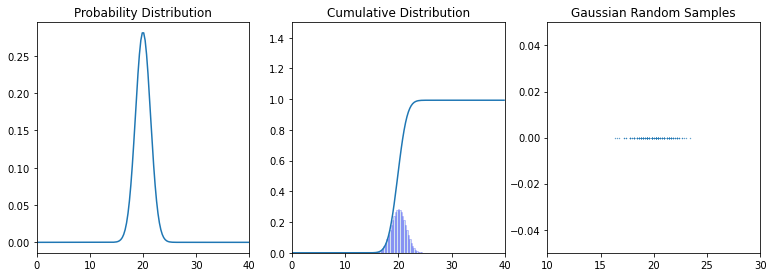

In [1]:
%matplotlib inline
import functools
import matplotlib.pyplot as plt
import numpy as np

def gaussian(mean, variance, x):
    '''Samples a gaussian distribution with specified mean and variance'''
    return (1 / np.sqrt((2 * np.pi * variance))) * np.exp(-0.5 * (((x - mean)**2)/(variance)))

def integrate(f, xaxis, dx):
    '''Calculate the midpoint Riemann sum integral approximation for function f'''
    mid_points = (xaxis[:-1] + xaxis[1:]) / 2
    return mid_points, np.cumsum(f(mid_points)) * dx

def gaussian_sampling(num_samples, mean, variance):
    '''Generates an array of random gaussian distributed points with a parametric distribution
       defined by mean and variance'''
    samples = np.random.rand(num_samples)
    xmin = 0.05 * mean
    xmax = 2.05 * mean
    linear_space = np.linspace(xmin, xmax, num_samples)
    dx = (xmax - xmin) / num_samples
    integral_x, integral_y = integrate(functools.partial(gaussian, mean, variance), linear_space, dx)
    points = []
    for sample in samples:
        try:
            points.append(integral_x[(np.where(integral_y >= sample))[0][0]])
        except IndexError:
            # The randomly generated sample is too close to 1 for us to produce a result with
            # the given number of samples. Ignore it and move on with life.
            continue
    return points


GROUND_TRUTH_MEAN = 20
GROUND_TRUTH_VARIANCE = 2
X_MIN = 0
X_MAX = 40
N_SAMPLE = 150
dx = (X_MAX - X_MIN) / N_SAMPLE

linear_sample = np.linspace(X_MIN, X_MAX, N_SAMPLE)

fig = plt.figure()
pdf = plt.subplot(1,3,1)
pdf.set_xlim(X_MIN, X_MAX)
pdf.set_title("Probability Distribution")

cdf = plt.subplot(1,3,2)
cdf.set_xlim(X_MIN, X_MAX)
cdf.set_ylim(0, 1.5)
cdf.set_title("Cumulative Distribution")

gaussian_random_samples = plt.subplot(1,3,3)
gaussian_random_samples.set_xlim(GROUND_TRUTH_MEAN  - 5 * GROUND_TRUTH_VARIANCE,
                                 GROUND_TRUTH_MEAN  + 5 * GROUND_TRUTH_VARIANCE)
gaussian_random_samples.set_ylim(-0.05 , 0.05)
gaussian_random_samples.set_title("Gaussian Random Samples")
plt.subplots_adjust(bottom=0.1, right=1.8, top=0.9)

pdf.plot(linear_sample,
         gaussian(GROUND_TRUTH_MEAN, GROUND_TRUTH_VARIANCE, linear_sample),
         label="Gaussian Probability Distribution")

data_dist = functools.partial(gaussian, GROUND_TRUTH_MEAN, GROUND_TRUTH_VARIANCE)
integral_x, integral_y = integrate(data_dist, linear_sample, dx)
cdf.plot(integral_x, integral_y)
cdf.bar(integral_x, data_dist(integral_x), width=(X_MAX - X_MIN)/ N_SAMPLE, alpha=0.2, edgecolor='b')

samples = np.array(gaussian_sampling(200, GROUND_TRUTH_MEAN, GROUND_TRUTH_VARIANCE))
gaussian_random_samples.scatter(samples, np.zeros(samples.size), s=0.1)

plt.show()


Looks good! Above we have a gaussian probability distribution function that we've defined with $\mu$ = GROUND_TRUTH_MEAN and

$\sigma^2$ = GROUND_TRUTH_VARIANCE. The parameters are defined as "ground truth" because they are the true parametric values of the data model. I decided to write my own functions to generate the gaussian distribution, cumulative distribution and randomly sampled gaussian distributed points but this was just done for my own understanding and they can easily be replaced with the numpy python module instead. Now we'll try to use maximum likelihood estimation to try and get a good estimate $\hat{\mu}$ and $\hat{\sigma^2}$ from our gaussian data samples. For this example we can find the first derivative of the likelihood function, but we won't always be able to do that. So lets start from the ground up, assuming all we know is that we think that the sample data is distributed as a gaussian function.

Optimal Mean: 20.202020202020204
Optimal Variance 1.7878787878787878


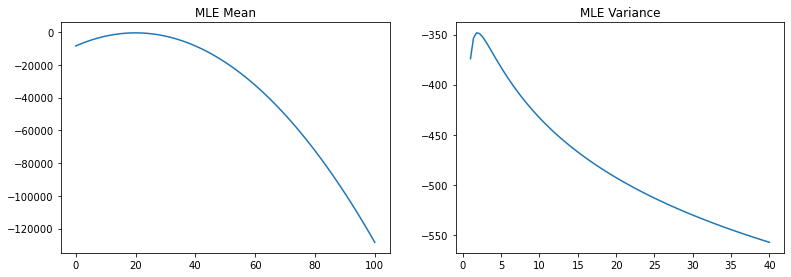

In [2]:
def gaussian_likelihood(mean, variance, x):
    '''Sample the likelihood function of a gaussian distribution with mean and variance'''
    num_samples = x.size
    term1 = -0.5 * num_samples * np.log(2 * np.pi)
    term2 = -0.5 * num_samples * np.log(variance)
    term3 = (-1 / (2 * variance)) * (np.sum((x-mean)**2))
    return term1 + term2 + term3

mean_estimates = np.linspace(0, 100, 100)
CONST_VAR = 5
likelihood = []
for mean in mean_estimates:
    likelihood.append(gaussian_likelihood(mean, CONST_VAR, samples))
mle_mean = plt.subplot(121)
mle_mean.set_title("MLE Mean")
mle_mean.plot(mean_estimates, likelihood)
likelihood = np.array(likelihood)
optimal_mean = mean_estimates[np.argmax(likelihood)]
print(f"Optimal Mean: {optimal_mean}")

variance_estimates = np.linspace(1, 40, 100)
CONST_MEAN = optimal_mean
likelihood = []
for variance in variance_estimates:
    likelihood.append(gaussian_likelihood(CONST_MEAN, variance, samples))
mle_variance = plt.subplot(122)
mle_variance.set_title("MLE Variance")
mle_variance.plot(variance_estimates, likelihood)
optimal_variance = variance_estimates[np.argmax(likelihood)]
print(f"Optimal Variance {optimal_variance}")

plt.subplots_adjust(bottom=0.1, right=1.8, top=0.9)
plt.show()

Now lets see how a gaussian distribution defined with these estimates compares to our ground truth model.

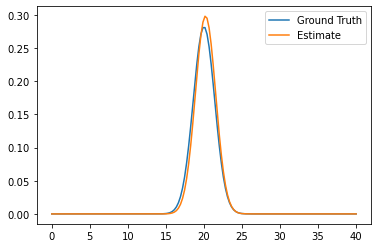

In [3]:
compr = plt.subplot(111)
compr.plot(linear_sample,
           gaussian(GROUND_TRUTH_MEAN, GROUND_TRUTH_VARIANCE, linear_sample),
           label="Ground Truth")
compr.plot(linear_sample,
           gaussian(optimal_mean, optimal_variance, linear_sample),
           label="Estimate")
compr.legend()
plt.show()

The results arent bad, but notice that to make the initial estimate for the MLE mean a constant variance had to be picked. What happens if this constant value varies?

Optimal Mean for variance 1: 20.202020202020204
Optimal Mean for variance 2: 20.202020202020204
Optimal Mean for variance 4: 20.202020202020204
Optimal Mean for variance 6: 20.202020202020204
Optimal Mean for variance 8: 20.202020202020204
Optimal Mean for variance 10: 20.202020202020204
Optimal Mean for variance 1000: 20.202020202020204


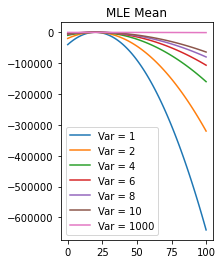

In [4]:
mean_estimates = np.linspace(0, 100, 100)
CONST_VAR = 5
mle_mean = plt.subplot(121)
mle_mean.set_title("MLE Mean")
variance_estimates = [1, 2, 4, 6, 8, 10, 1000]
for variance in variance_estimates:
    likelihood = []
    for mean in mean_estimates:
        likelihood.append(gaussian_likelihood(mean, variance, samples))
    likelihood = np.array(likelihood)
    mle_mean.plot(mean_estimates, likelihood, label=f"Var = {variance}")
    optimal_mean = mean_estimates[np.argmax(likelihood)]
    print(f"Optimal Mean for variance {variance}: {optimal_mean}")
mle_mean.legend()
plt.show()

It looks like increasing the variance flattens the likelihood curve, but the peak of the function is very insensitive to the variance, but what if we did this experiment the other way around and varied the mean as we tried to estimate the variance?

Optimal Variance for mean 0: 40.0
Optimal Variance for mean 2: 40.0
Optimal Variance for mean 4: 40.0
Optimal Variance for mean 8: 40.0
Optimal Variance for mean 16: 17.939393939393938
Optimal Variance for mean 20: 1.7878787878787878
Optimal Variance for mean 32: 40.0
Optimal Variance for mean 64: 40.0


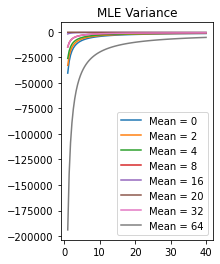

In [5]:
variance_estimates = np.linspace(1, 40, 100)
mle_variance = plt.subplot(122)
mle_variance.set_title("MLE Variance")
mean_estimates = [0, 2, 4, 8, 16, 20, 32, 64]
for mean in mean_estimates:
    likelihood = []
    for variance in variance_estimates:
        likelihood.append(gaussian_likelihood(mean, variance, samples))
    mle_variance.plot(variance_estimates, likelihood, label=f"Mean = {mean}")
    optimal_variance = variance_estimates[np.argmax(likelihood)]
    print(f"Optimal Variance for mean {mean}: {optimal_variance}")
mle_variance.legend()
plt.show()

The variance is **much** more dependent on the mean than the mean is on the variance. If we go back to our solved equations for $\hat{\mu}_{MLE}$ and $\hat{\sigma^2}_{MLE}$:

$$
\begin{aligned}
\hat{\sigma^2}_{MLE} &= \frac{2}{n}\sum^m_{i=1}(x_i - \mu)^2\\
\hat{\mu}_{MLE} &= \frac{1}{m}\sum^{m}_{i=1}x_i
\end{aligned}
$$

There is a $\mu$ term in the equation for the optimal $\sigma^2$ estimator, but the optimal $\mu$ estimator is reliant only on the sampled data set.

One last experiment we can do is to look at the behaviour of the likelihood curve as the number of samples $N$ increases.

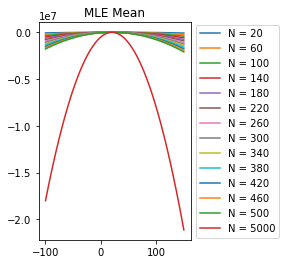

In [6]:
mean_estimates = np.linspace(-100, 150, 100)
CONST_VAR = 5
mle_mean = plt.subplot(121)
mle_mean.set_title("MLE Mean")
num_samples = [20, 60, 100, 140, 180, 220, 260, 300, 340, 380, 420, 460, 500, 5000]
for N in num_samples:
    samples = np.array(gaussian_sampling(N, GROUND_TRUTH_MEAN, GROUND_TRUTH_VARIANCE))
    likelihood = []
    for mean in mean_estimates:
        likelihood.append(gaussian_likelihood(mean, 2, samples))
    mle_mean.plot(mean_estimates, likelihood, label=f"N = {N}")
mle_mean.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()

**Increasing the number of data points in the sample set increases the amount of curvature in the likelihood curve and makes the peak of the likelihood curve more prominent**. This suggests that as we're increasing the number of data points used by the estimator the estimate is becoming closer and closer to the true value of $\theta$. Another way to say think about this is as an increase in confidence about our estimate as we sample larger data sets.

#### Asyptotic Properties of Maximum Likelihood Estimation

For these next two derivations we'll need to apply two fundamental theorems in statistics. These derivations are taken directly from [9] so feel free to look at the original from the reference list above. I'm repeating the derivation to get a better understanding of why the asymptotic properties of MLE are true.

##### The Law of Large Numbers
As the size of a sample data set $N$ increases the sample mean $\tilde{X}$ approaches the population mean $E[X]$. This can also be stated as:

$$
\begin{aligned}
P(|\tilde{X^m} - E[X^1]| > \epsilon) \rightarrow E[X]
\end{aligned}
$$
Makes sense, the values of $X_i$ will always tend towards the most probable result $x$.

#### The Central Limit Theorem
The sampling distribution of the mean mean of some arbritrary number of m sample sets $X^m$ with $N$ samples each the sample means will be normally distributed as $N \rightarrow \infty$.

$$
\begin{aligned}
\sqrt{n}(\tilde{X^m} - E[X]) \rightarrow^d N(0, \sigma^2)
\end{aligned}
$$

This also makes intuitive sense, because as your sample size increases you're going to have less and less variation from the true mean because your sample set is going to be composed of a large percentage of your population.

#### Consistency

The MLE is the maxima of $L_n(\hat{\theta})$ such that:

$$
\begin{aligned}
L_n(\hat{\theta}) = \frac{1}{n}\sum^n_{i=1}\log{f(X_i|\hat{\theta})}
\end{aligned}
$$

This is equivalent to the log-likelihood function of a distribution normalized by $\frac{1}{n}$ (the inverse of the number of samples in the sample set) this normalization term isnt in our previously MLE derived equation but it will not change the position of the peak, so in terms of the maximal optimization problem of solving for $\hat{\theta}_{MLE}$ the two equations are equivalent. By the law of large numbers, we know that the mean of $L_n(\hat{\theta})$ will eventually will converge to the true expected value of the distribution with respect to the true value ($\theta$) of our estimate ($\hat{\theta}$). So lets define another function with $E_{\theta}$ representing the expected value with respect to the true value of theta (the probability distribution used for the p(x) term in the expected value will be taken from the distribution with the true value of $\hat{\theta}$):

$$
\begin{aligned}
L(\hat{\theta}) = E_{\theta}[\log{f(X^m|\hat{\theta})}] = \int{\log{f(X^m|\hat{\theta})}f(X^m|\theta)dx}
\end{aligned}
$$

And we know that $L_n(\theta) \rightarrow E_{\theta}[\log{f(X^m|\hat{\theta})}] = L[\hat{\theta}]$ as $n \rightarrow \infty$ via the law of large numbers.

Now lets look at the difference $L(\hat\theta) - L(\theta)$.

$$
\begin{aligned}
L(\hat\theta) - L(\theta) &= E_{\theta}[\log{f(X^m|\hat{\theta})} - \log{f(X^m|\theta)}]\\
&= E_{\theta}[\log{\frac{f(X^m|\hat{\theta})}{f(X^m|\theta)}}]
\end{aligned}
$$

For any $t \geq 1$, $\log{t} \leq t - 1$. The proof for this is shown in [10], its relatively simple so I'm not going to be elaborating on this. We can use this identity to show:

$$
\begin{aligned}
E_{\theta}[\log{\frac{f(X^m|\hat{\theta})}{f(X^m|\theta)}}] \leq E_{\theta}[\frac{f(X^m|\hat{\theta})}{f(X^m|\theta)}] &= \int{(\frac{f(X^m|\hat{\theta})}{f(X^m|\theta)} - 1)(f(X^m|\theta))dx}\\
&= \int{(f(X^m|\hat{\theta})}-{f(X^m|\theta))dx}\\
&= 1 - 1\\
&= 0 \\
L(\hat{\theta}) - L(\theta) &\leq 0\\
\end{aligned}
$$

There may be a few steps in this derivation that were confusing. Remember that $f(X^m|\hat{\theta})$ and $f(X^m|\theta)$ are probability distributions, so their indefinite integrals need to be equal to 1 because thats the cumulative distribution. Also remember that as $n\rightarrow \infty$, $L_n(\hat{\theta}) \rightarrow L(\hat{\theta})$, and likewise for when we sub in $\theta$ instead of $\hat{\theta}$.

We know $L(\hat{\theta}) - L(\theta) \leq 0$, now suppose that we sub in $\hat{\theta}_{ML}$ for $\hat{\theta}$. As long as the loglikelihood function is constrained, this means the expected value with respect to $\theta$ of the loglikelihood function for a sample setcalculated using $P(X|\hat{\theta}_{MLE})$ will approach the the expected value calculated with $P(X|\theta)$. This implies $\hat{\theta}_{ML} \rightarrow \theta$ as $n \rightarrow \infty$, which means that $\hat{\theta}_{ML}$ is a consistent estimator.

#### Asymptotic Normality

Fisher information $I(\theta)$ is a measure of the amount of curvature observed in the likelihood curve produced by estimate $\hat{\theta}$.

$$
\begin{aligned}
I(\theta) &= E_\theta[\frac{\delta}{\delta \theta}\log{f(X^m|\theta)}] \\
&= E_\theta[\frac{f'(X^m|\theta)}{f(X^m|\theta)}]
\end{aligned}
$$

$\frac{f'(X^m|\theta)}{f(X^m|\theta)}$ is a measure of how much the probability distribution is according to $\hat{\theta}$ near $\theta$. The square of the expectation is just an average of that value. If its changing quickly then the distribution when $\hat{\theta} = \theta$ is more well defined so we can probably pick out $\theta$ easily. If its not changing much then the distribution at $\theta$ is not very different from the distributions when $\hat{\theta}$ is near $\theta$, so its more difficult to pick out the correct value.

To begin deriving the asymptotic normality of the MLE we have to use the mean value theorem, which is just a way to calculate the derivative at some point $c \in [a,b]$.

$$
\begin{aligned}
\frac{f(b) - f(a)}{b - a} &= f'(c) \\
f(b) &= f(a) + f'(c)(b - a)
\end{aligned}
$$

Now suppose a = $\theta$, b = $\hat{\theta}_{MLE}$ and c = $\theta_1$ where $\theta_1 \in [\theta, \hat{\theta}_{MLE}]$.

$$
\begin{aligned}
0 = L_n'(\theta) + L_n''(\theta_1)(\hat{\theta}_{MLE} - \theta)\\
(\hat{\theta}_{MLE} - \theta) &= -\frac{L_n'(\theta)}{L_n''(\theta_1)}\\
\sqrt{n}(\hat{\theta}_{MLE} - \theta) &= -\sqrt{n}\frac{L_n'(\theta)}{L_n''(\theta_1)}
\end{aligned}
$$

At this point remember that $\theta$ is the maximizer of $L(\hat{\theta})$ and $\hat{\theta}_{MLE}$ is the maximizer for $L_n(\hat{\theta})$. So $L'(\theta) = 0$ and $L'_n(\hat{\theta}_{MLE}) = 0$. The additional $\sqrt{n}$ scaling factor is just so that we can apply the central limit theorem later. Now looking at the numerator:

$$
\begin{aligned}
\sqrt{n}L_n'(\theta) &= \sqrt{n}(\frac{1}{n}\sum^n_{i=1}(\frac{\delta}{\delta \theta}\log{f(X^m_i|\theta}))\\
\sqrt{n}L_n'(\theta) &= \sqrt{n}(\frac{1}{n}\sum^n_{i=1}(\frac{f'(X^m|\theta)}{f(X^m|\theta)})\\
\sqrt{n}L_n'(\theta) &= \sqrt{n}(\frac{1}{n}\sum^n_{i=1}(\frac{f'(X^m|\theta)}{f(X^m|\theta)} - 0)\\
\sqrt{n}L_n'(\theta) &= \sqrt{n}(\frac{1}{n}\sum^n_{i=1}(\frac{f'(X^m|\theta)}{f(X^m|\theta)} - E_\theta[L'(\theta)])\\
\sqrt{n}L_n'(\theta) &= \sqrt{n}(\frac{1}{n}\sum^n_{i=1}(\frac{f'(X^m|\theta)}{f(X_1|\theta)} - E_\theta[L'(\theta)]) \rightarrow^{D} N(0, Var_{\theta}(\frac{\delta}{\delta \theta}\log{f(X_1|\theta)}))
\end{aligned}
$$

This last step is just applying the central limit theorem. So we know the numerator will become a normal distribution as $n$ increases. Lets look at the denominator.

$$
\begin{aligned}
L_n''(\theta_1) = \frac{1}{n}\sum{\frac{\delta^2}{\delta \theta^2}\log{f(X_1|\theta_1})} &\rightarrow E_\theta[\frac{\delta^2}{\delta \theta^2}\log{f(X_1|\theta_1})]\\
E_\theta[\frac{\delta^2}{\delta \theta^2}\log{f(X_1|\theta_1})] &= \int{(\log{f(x|\theta)})''f(x|\theta)dx}\\
&= \int{((\frac{f''(x|\theta)}{f(x|\theta)}) - (\frac{f'(x|\theta)}{f(x|\theta)})^2)}f(x|\theta)dx\\
&= \int{f''(x|\theta)dx - (\frac{f'(x|\theta)}{f(x|\theta)})^2)f(x|\theta)dx}\\
&= \int{f''(x|\theta)dx - E_\theta[\frac{f'(x|\theta)}{f(x|\theta)}]^2}\\
&= 0 - I(\theta)\\
&= -I(\theta)
\end{aligned}
$$

This ends up being a scaling factor and not a random variable, so the overall fraction will still have a normal distribution. Now via substitution we get

$$
\begin{aligned}
\sqrt{n}(\hat{\theta}_{MLE} - \theta) &= -\sqrt{n}\frac{L_n'(\theta)}{L_n''(\theta_1)}\\
\sqrt{n}(\hat{\theta}_{MLE} - \theta) &\rightarrow^D N(0, \frac{Var_\theta(\frac{\delta}{\delta \theta}\log{f(X|\theta})}{I(\theta)^2}
\end{aligned}
$$

We can clean up the variance equation slightly:
$$
\begin{aligned}
Var_\theta(\frac{\delta}{\delta \theta}\log{f(X|\theta}) &= E_\theta[(\frac{\delta}{\delta \theta}\log{f(X|\theta})^2] - E_\theta[\frac{\delta}{\delta \theta}\log{f(X|\theta})]^2\\
&= I(\theta) - 0
\end{aligned}
$$
This leaves us with our desired proof
$$
\begin{aligned}
\sqrt{n}(\hat{\theta}_{MLE} - \theta) &\rightarrow^D N(0, \frac{1}{I(\theta)})
\end{aligned}
$$


#### Approximate Confidence Levels of Maximum Likelihood Estimators

The benefit of asymptotic normality is that we can provide an approximate range of values for our estimation depending on how confident we want to be that the true value $\theta$ is in our provided range. By providing the range of values of $\hat{\theta}$ that capture 95% of the area of the normal curve that is produced when the number of samples $n \rightarrow \infty$ we can say with 95% confidence that $\theta$ will fall within that range. For a standard normal distribution this range is calculated as:

$$
\begin{aligned}
\bar{x} \pm z\frac{\sigma}{\sqrt{n}}
\end{aligned}
$$

Where $z$ is some a constant known as the Z-score of a normal distribution. The Z-score can be interpreted as the number of standard deviations away from the mean a particular data point happens to be. 

$$
\begin{aligned}
z = \frac{x - \mu}{\sigma}
\end{aligned}
$$

We want to select a z-score such that the point $P(x \geq z \sigma - \mu\ and\ x\leq z \sigma + \mu) = 0.95$. The normal way to find this value is to look it up from a table of z-score values that are generated by sampling the cumulative distribution function of a standard normal distribution (where $\sigma = 1$). We can then scale this value with the correct variance of our non-standard normal distribution to give us the corresponding corresponding value in our distribution within the same confidence interval.

$\sigma$ is the standard deviation of the normal distribution. For the normal distribution generated by the maximum likelihood estimate this standard deviation is $\frac{1}{\sqrt{I(\theta)}}$. So our $\hat{\theta}_{MLE}$ interval range becomes:

$$
\begin{aligned}
(\hat{\theta}_{MLE} - z\frac{1}{\sqrt{nI(\theta)}}, \hat{\theta}_{MLE} + z\frac{1}{\sqrt{nI(\theta)}})
\end{aligned}
$$

Because this is just an estimate, we have to use $I(\hat{\theta})$ instead of $I(\theta)$ since the true value of $\theta$ is unknown.

Lets continue the previous example, but this time with multiple sample sets of size n. First we'll do a sanity check on the asymptotic properties of sampled gaussian distributions. We can start by repeatedly creating sample sets of 100 samples, calculating the sample mean and observing the change in the distribution of the sample means as $n$ increases.

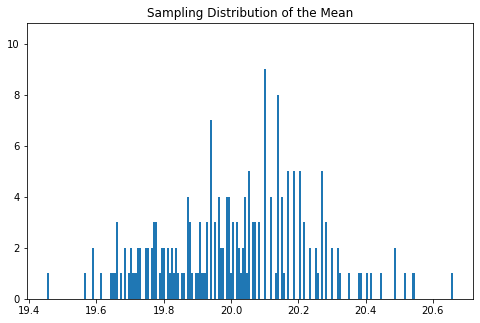

In [21]:
m = 200
n = 50
mean_bar_graph = plt.subplot(111)
means = []
for i in range(m):
    samples = np.array(gaussian_sampling(n, GROUND_TRUTH_MEAN, GROUND_TRUTH_VARIANCE))
    mean = np.sum(samples) / samples.size
    means.append(mean)
    
means, b = np.histogram(means, bins=m)
mean_bar_graph.set_ylim(0, np.max(means) * 1.2)
mean_bar_graph.bar(b[1:], means, width=((b[-1] - b[1]) / m))
mean_bar_graph.set_title("Sampling Distribution of the Mean")
plt.show()

This looks somewhat normally distributed already, but lets try increasing $n$.

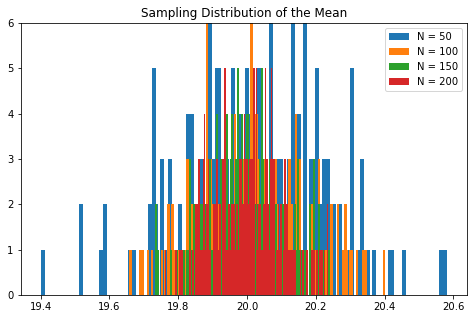

In [8]:
m = 200
ns = [50, 100, 150, 200]

mean_bar_graph = plt.subplot(111)
mean_bar_graph.set_title("Sampling Distribution of the Mean")

for n in ns:
    means = []
    for i in range(m):
        samples = np.array(gaussian_sampling(n, GROUND_TRUTH_MEAN, GROUND_TRUTH_VARIANCE))
        mean = np.sum(samples) / samples.size
        means.append(mean)
    means, b = np.histogram(means, bins=m)
    mean_bar_graph.bar(b[1:], means, width=(2 * (b[-1] - b[1]) / m), label=f"N = {n}")
mean_bar_graph.set_ylim(0, np.max(means) * 1.2)
mean_bar_graph.legend()
plt.show()

As expected the sampling distribution becomes narrower and more centered on $\theta$. Now if we apply the same process on the MLE estimator of the mean we should see the same results.

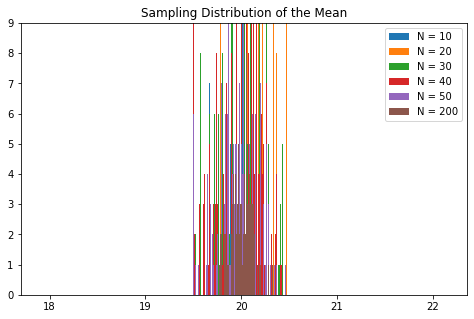

In [10]:
m = 500
ns = [10, 20, 30, 40, 50, 200]

mean_bar_graph = plt.subplot(111)
mean_bar_graph.set_title("Sampling Distribution of the Mean")

def find_mle_mean(sample_set):
    mean_estimates = np.linspace(19.5, 20.5, 500)
    CONST_VAR = 5
    likelihood = []
    for mean in mean_estimates:
        likelihood.append(gaussian_likelihood(mean, CONST_VAR, sample_set))
    likelihood = np.array(likelihood)
    return mean_estimates[np.argmax(likelihood)]

for n in ns:
    means = []
    for i in range(m):
        samples = np.array(gaussian_sampling(n, GROUND_TRUTH_MEAN, GROUND_TRUTH_VARIANCE))
        mean = find_mle_mean(samples)
        means.append(mean)
    means, b = np.histogram(means, bins=m)
    mean_bar_graph.bar(b[1:], means, width=(2 * (b[-1] - b[1]) / m), label=f"N = {n}")
mean_bar_graph.set_ylim(0, np.max(means) * 1.2)
mean_bar_graph.set_xlim(b[1] * 0.9, b[-1] * 1.1)
mean_bar_graph.legend()
plt.show()